# EJERCICIO PROPUESTO

Se  propone  como  ejercicio  realizar  un  modelo  predictivo  de  clasificación,  con  el  previo  EDA sobre los datos disponibles, del conjunto de datos http://archive.ics.uci.edu/ml/datasets/AdultEn estos datos se encuentran las columnas:
- age: continua.
- workclass: categórica 
            Private,
            Self-emp-not-inc, Self-emp-inc,
            Federal-gov,
            Local-gov, State-gov,
            Without-pay, Never-worked.
- fnlwgt: continua.
- education: categórica 
            Bachelors, Some-college,11th,HS-grad,Prof-school,Assoc-acdm,Assoc-voc,9th,7th-8th,12th,   Masters,1st-4th,10th,Doctorate,5th-6th,Preschool. 
- education-num: continua. 
- marital-status: categórica 
            Married-civ-spouse,Divorced,Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: categórica 
            Tech-support,Craft-repair,Other-service,Sales,Exec-managerial,Prof-specialty,Handlers-cleaners,Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: categórica 
            Wife,Own-child,Husband,Not-in-family,Other-relative, Unmarried. 
- race: categórica 
            White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: categórica 
            Female, Male.
- capital-gain: continua.
- capital-loss:continua. 
- hours-per-week: continua. 
- native-country: categórica 
        United-States,  Cambodia,  England,  Puerto-Rico,  Canada, Germany,  Outlying-US(Guam-USVI-etc),  India,           Japan,  Greece,  South,  China,  Cuba, Iran,  Honduras, Philippines, Italy,  Poland,  Jamaica, Vietnam,           Mexico,  Portugal,  Ireland, France,   Dominican-Republic,   Laos,   Ecuador,   Taiwan,   Haiti,                   Columbia,   Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago,           Peru, Hong, Holand-Netherlands.

El objetivo del sistema será intentar predecir la categoría de salida siguiente:

Salario > 50k, Salario <= 50K

De  esta forma  se  quiere  estudiar  la  relevancia  de  los  parámetros  expuestos, obtenidos de un censo, en la predicción del sueldo anual de un empleado

# 1. Carga de los datos

En primer lugar se procede a importar los datos y conocer que columnas hay en el csv

In [76]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [8]:
# Cargar el dataset
dataset_adult = pd.read_csv('adult.data.csv',sep=",")

In [9]:
# Exploracion inicial
dataset_adult.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
# Columnas
print(dataset_adult.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educationnum',
       'maritalstatus', 'occupation', 'relationship', 'race', 'sex',
       'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry',
       'income'],
      dtype='object')


# 2. Análisis Exploratorio de Datos (EDA)

Antes de plantearse construir cualquier modelo conviene estudiar e investigar los datos para comprenderlos mejor, ver en qué se caracterizan y con ello poder hacerse preguntas sobre los mismos que puedan responderse con el uso de distintos modelos de ML.

In [11]:
# Información relevante sobre las columnas
dataset_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32561 non-null  int64 
 1   workclass      32561 non-null  object
 2   fnlwgt         32561 non-null  int64 
 3   education      32561 non-null  object
 4   educationnum   32561 non-null  int64 
 5   maritalstatus  32561 non-null  object
 6   occupation     32561 non-null  object
 7   relationship   32561 non-null  object
 8   race           32561 non-null  object
 9   sex            32561 non-null  object
 10  capitalgain    32561 non-null  int64 
 11  capitalloss    32561 non-null  int64 
 12  hoursperweek   32561 non-null  int64 
 13  nativecountry  32561 non-null  object
 14  income         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
# validamos la existencia de valores desconocidos
dataset_adult.isin([' ?']).sum(axis=0)

age                 0
workclass        1836
fnlwgt              0
education           0
educationnum        0
maritalstatus       0
occupation       1843
relationship        0
race                0
sex                 0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry     583
income              0
dtype: int64

las variables workclass, occupation y nativecountry tienen datos desconocidos por lo cual lo vamos a quitar estos valores de nuestro dataframe

In [13]:
# filtramos los valores desconocidos (' ?') para las variables workclass, nativecountry, occupation
dataset_adult = dataset_adult.query('workclass!=" ?"')
dataset_adult = dataset_adult.query('nativecountry!=" ?"')
dataset_adult = dataset_adult.query('occupation!=" ?"')
dataset_adult.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
dataset_adult.isnull().sum()

age              0
workclass        0
fnlwgt           0
education        0
educationnum     0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
income           0
dtype: int64

verificamos que estos valores ya no esten en el dataframe para las variables con valores desconocidos
verificamos que estos valores ya no esten en el dataframe

In [15]:
print(dataset_adult.query('workclass==" ?"'))
print(dataset_adult.query('nativecountry==" ?"'))
print(dataset_adult.query('occupation==" ?"'))

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, educationnum, maritalstatus, occupation, relationship, race, sex, capitalgain, capitalloss, hoursperweek, nativecountry, income]
Index: []
Empty DataFrame
Columns: [age, workclass, fnlwgt, education, educationnum, maritalstatus, occupation, relationship, race, sex, capitalgain, capitalloss, hoursperweek, nativecountry, income]
Index: []
Empty DataFrame
Columns: [age, workclass, fnlwgt, education, educationnum, maritalstatus, occupation, relationship, race, sex, capitalgain, capitalloss, hoursperweek, nativecountry, income]
Index: []


In [16]:
# listamos la variable que no son numericas
dataset_adult.select_dtypes(exclude=np.number).columns

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'nativecountry', 'income'],
      dtype='object')

In [17]:
# listamos las variables numericas
dataset_adult.select_dtypes(include=np.number).columns

Index(['age', 'fnlwgt', 'educationnum', 'capitalgain', 'capitalloss',
       'hoursperweek'],
      dtype='object')

In [18]:
# Descripcion estadística de los datos
dataset_adult.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30162.0,38.437902,13.134665,17.0,28.00,37.0,47.0,90.0
fnlwgt,30162.0,189793.833930,105652.971529,13769.0,117627.25,178425.0,237628.5,1484705.0
educationnum,30162.0,10.121312,2.549995,1.0,9.00,10.0,13.0,16.0
capitalgain,30162.0,1092.007858,7406.346497,0.0,0.00,0.0,0.0,99999.0
capitalloss,30162.0,88.372489,404.298370,0.0,0.00,0.0,0.0,4356.0
hoursperweek,30162.0,40.931238,11.979984,1.0,40.00,40.0,45.0,99.0


###    30162 personas analizadas.
###    la edad va desde 17 hasta 90 años.
###    el Capital-gain va desde 0 hasta 99999
###    el capital-loss va desde 0 hasta 4356
###    las horas trabajadas por semana van desde 1 hasta 99

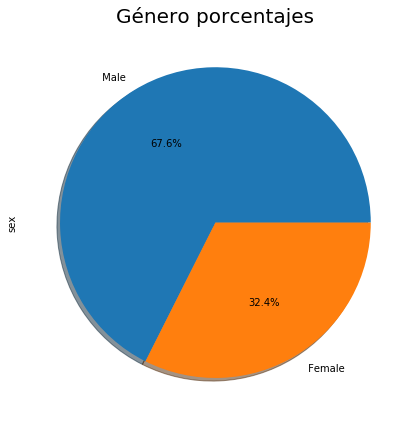

In [19]:
# revisamos la proporcion de los datos para el genero
dataset_adult['sex'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(6,6))
plt.title('Género porcentajes', fontsize = 20)
plt.tight_layout()
plt.show()

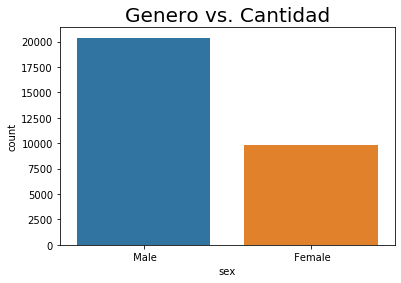

In [20]:
sns.countplot(dataset_adult['sex'])
plt.title ('Genero vs. Cantidad', fontsize = 20)
plt.show()

### se puede evidenciar que la mayoria de los datos son de genero masculino

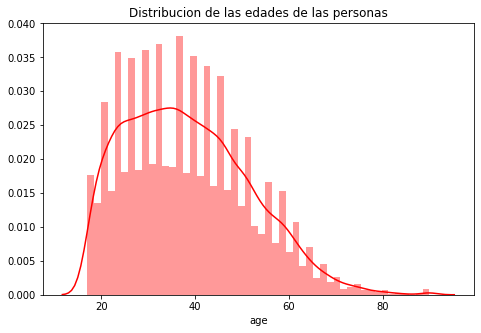

In [21]:
f=plt.figure(figsize=(17,5))

ax=f.add_subplot(122)
sns.distplot(dataset_adult["age"],color='red',ax=ax)
ax.set_title('Distribucion de las edades de las personas')

plt.show()

### la mayoria de los datos arrojan que la edad con mayor concentracion de personas oscila de entre los 20 hasta los 45

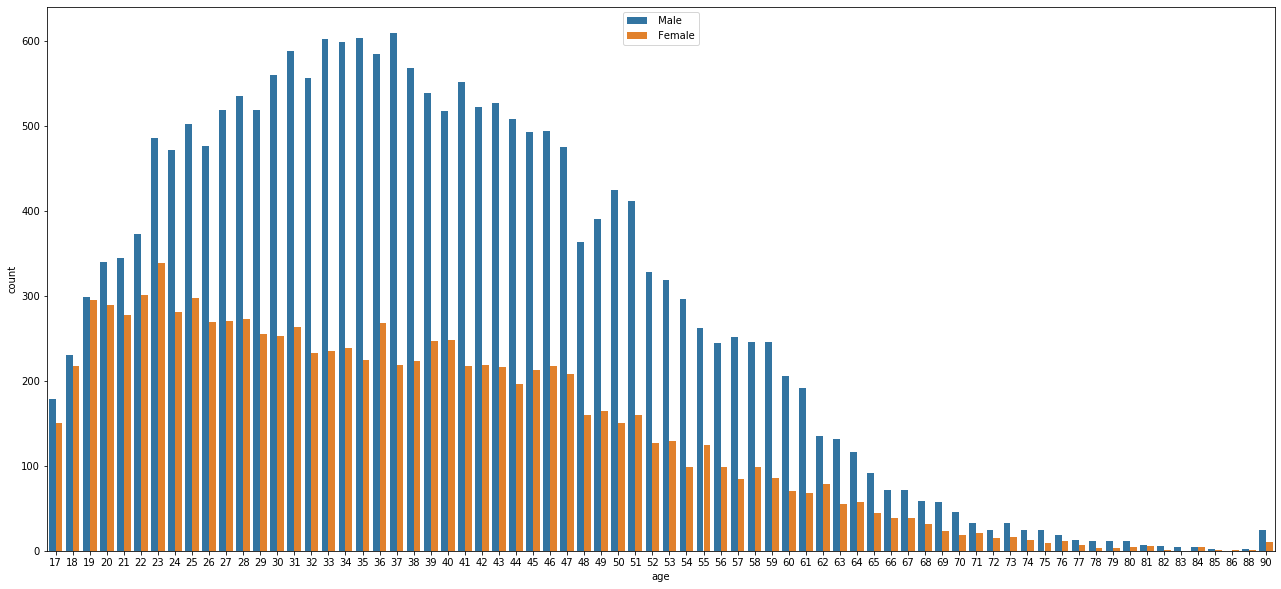

In [22]:
plt.figure(figsize = (22,10))
sns.countplot(x = 'age',data = dataset_adult , hue='sex')
plt.legend(loc='upper center')
plt.show()

### se visualiza que hay mas personas del genero masculino

In [23]:
dataset_adult['nativecountry'].value_counts(normalize=True)*100

 United-States                 91.187587
 Mexico                         2.022412
 Philippines                    0.623301
 Germany                        0.424375
 Puerto-Rico                    0.361382
 Canada                         0.354751
 El-Salvador                    0.331543
 India                          0.331543
 Cuba                           0.305020
 England                        0.285127
 Jamaica                        0.265234
 South                          0.235396
 Italy                          0.225449
 China                          0.225449
 Dominican-Republic             0.222134
 Vietnam                        0.212188
 Guatemala                      0.208872
 Japan                          0.195610
 Columbia                       0.185664
 Poland                         0.185664
 Taiwan                         0.139248
 Haiti                          0.139248
 Iran                           0.139248
 Portugal                       0.112725
 Nicaragua      

### la mayoria de los los datos de los encuestados pertenecen a EEUU con un 91%

In [24]:
# filtramos los valores unicos por cada variable no numerica

for cols in dataset_adult.select_dtypes(exclude=np.number).columns:
    print(cols, ':', dataset_adult[cols].unique(), end='\n\n')

workclass : [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']

education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']

maritalstatus : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation : [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']

relationship : [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

race : [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

sex : [' Male' ' Female']

nativecountry : [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexi

In [25]:
# revisamos si las variables educationnum y education tienen alguna relacion entre sí
pd.crosstab(dataset_adult['educationnum'],dataset_adult['education'])

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
educationnum,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,45,0,0
2,0,0,0,151,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,288,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,557,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,455,0,0,0,0,0,0,0,0,0
6,820,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,1048,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,377,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,9840,0,0,0,0


### podemos visualizar que educationnum si tiene relacion con education 
### el educationnum es el identificador de education por lo tanto se va a excluir del dataset

In [26]:
# Analizamos la variable fnlwgt
print (dataset_adult['fnlwgt'])

0         77516
1         83311
2        215646
3        234721
4        338409
          ...  
32556    257302
32557    154374
32558    151910
32559    201490
32560    287927
Name: fnlwgt, Length: 30162, dtype: int64


### segun el resultado lo valores son numericos por lo que puede representar un identificador o codigo, podemos excluirlo del analisis que se está realizando

In [27]:
# agrupamos la categoria estado civil en solteros y casados
dataset_adult['maritalstatus'] = dataset_adult['maritalstatus'].replace({'Never-married','Divorced', 'Separated', 'Widowed'}, 'Single', regex=True)
dataset_adult['maritalstatus'] = dataset_adult['maritalstatus'].replace({'Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'}, 'Married', regex=True)

# agrupamos la educación
dataset_adult['education'] = dataset_adult['education'].replace({'Preschool','1st-4th','5th-6th', '7th-8th'}, 'Elementary-School', regex=True)
dataset_adult['education'] = dataset_adult['education'].replace({'9th','10th', '11th', '12th', 'HS-grad'}, 'High-School', regex=True)
dataset_adult['education'] = dataset_adult['education'].replace({'Masters', 'Doctorate'}, 'Advanced-Studies', regex=True)
dataset_adult['education'] = dataset_adult['education'].replace({'Bachelors', 'Some-college'}, 'College', regex=True)
dataset_adult['education'] = dataset_adult['education'].replace({'Prof-school', 'Assoc-acdm', 'Assoc-voc'}, 'Professional-School', regex=True)

# agrupamos el tipo de trabajo
dataset_adult['workclass'] = dataset_adult['workclass'].replace({'Self-emp-inc', 'Self-emp-not-inc'}, 'SelfEmployed', regex=True)
dataset_adult['workclass'] = dataset_adult['workclass'].replace({'Local-gov', 'State-gov', 'Federal-gov'}, 'Gov-job', regex=True)
dataset_adult['workclass'] = dataset_adult['workclass'].replace({'Without-pay','Never-worked'}, 'Unemployed', regex=True)

In [28]:
print("valores de maritalstatus: ",dataset_adult["maritalstatus"].unique(),'\n')
print("valores de education: ",dataset_adult["education"].unique(),'\n')
print("valores de workclass: ",dataset_adult["workclass"].unique(),'\n')

valores de maritalstatus:  [' Single' ' Married'] 

valores de education:  [' College' ' High-School' ' Advanced-Studies' ' Professional-School'
 ' Elementary-School'] 

valores de workclass:  [' Gov-job' ' SelfEmployed' ' Private' ' Unemployed'] 



In [29]:
# filtramos los valores unicos por cada variable no numerica

for cols in dataset_adult.select_dtypes(exclude=np.number).columns:
    print(cols, ':', dataset_adult[cols].unique(), end='\n\n')

workclass : [' Gov-job' ' SelfEmployed' ' Private' ' Unemployed']

education : [' College' ' High-School' ' Advanced-Studies' ' Professional-School'
 ' Elementary-School']

maritalstatus : [' Single' ' Married']

occupation : [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']

relationship : [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

race : [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

sex : [' Male' ' Female']

nativecountry : [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Columbia' ' Cambodia' ' Thailand' ' Ecuador' ' Laos'
 ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic' ' El-Salvador'
 ' France' ' Guatemala' '

In [30]:
dataset_adult.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,Gov-job,77516,College,13,Single,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,SelfEmployed,83311,College,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,High-School,9,Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,High-School,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,College,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### quitamos las siguientes variables nativecountry, fnlwgt, educationnum no influyen si una persona puede o no ganar +o- 50K por lo expuesto lineas arriba

### la mayoria de los datos corresponde a personas nacidas en US
### los valores de educationnum es el codigo designado a la descripcion de educacion
### fnlwgt son ids

In [31]:
dataset_adult2 = dataset_adult.copy()
dataset_adult2 = dataset_adult2.drop(['nativecountry', 'fnlwgt', 'educationnum'], axis=1)
dataset_adult2.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,income
0,39,Gov-job,College,Single,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,SelfEmployed,College,Married,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,High-School,Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,High-School,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,College,Married,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


In [32]:
dataset_adult2.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,income
0,39,Gov-job,College,Single,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,SelfEmployed,College,Married,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,High-School,Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,High-School,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,College,Married,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


 <=50K    0.751078
 >50K     0.248922
Name: income, dtype: float64


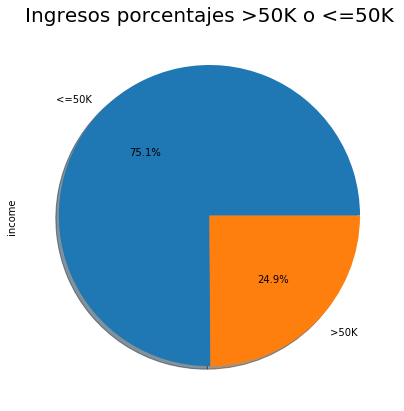

In [33]:
print(dataset_adult2['income'].value_counts(dropna=False)/len(dataset_adult2))

# revisamos la proporcion de los datos para el genero
dataset_adult2['income'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(6,6))
plt.title('Ingresos porcentajes >50K o <=50K', fontsize = 20)
plt.tight_layout()
plt.show()

### el porcentaje de personas que pueden tener ingresos superiors a 50K representa un 24.9%

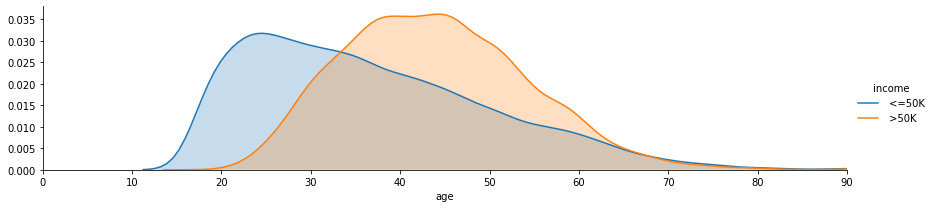

In [34]:
facet = sns.FacetGrid(dataset_adult2, hue="income", aspect=4)
facet.map(sns.kdeplot,'age', shade= True)
facet.set(xlim=(0, dataset_adult2['age'].max()))
facet.add_legend()

### podemos visualizar que la edad puede ser un factor que esté involucrado directamente a si se puede o no tener ingresos superiores a 50K

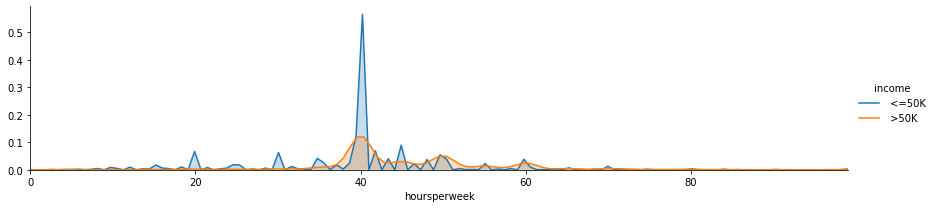

In [35]:
facet = sns.FacetGrid(dataset_adult2, hue="income", aspect=4)
facet.map(sns.kdeplot,'hoursperweek', shade= True)
facet.set(xlim=(0, dataset_adult2['hoursperweek'].max()))
facet.add_legend()

### los datos arrojan que las personas que laboran en promedio mas de 40 horas tienen ingresos superiores a 50k

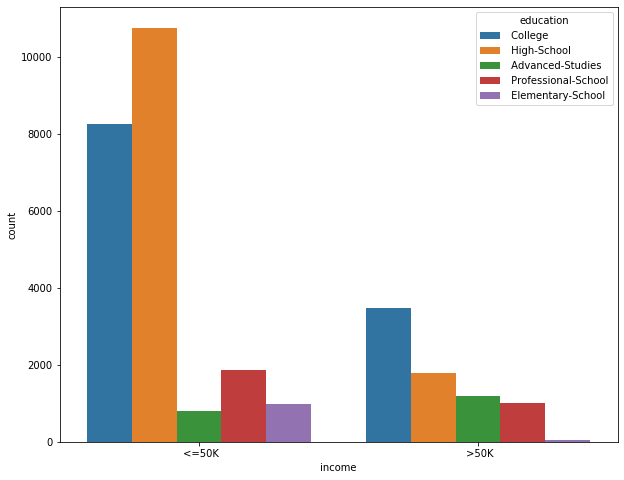

In [36]:
plt.figure(figsize=(10,8))
sns.countplot('income', hue='education', data=dataset_adult2)

### el nivel de educacion tambien influye en el si puede o no tener los ingresos >50K

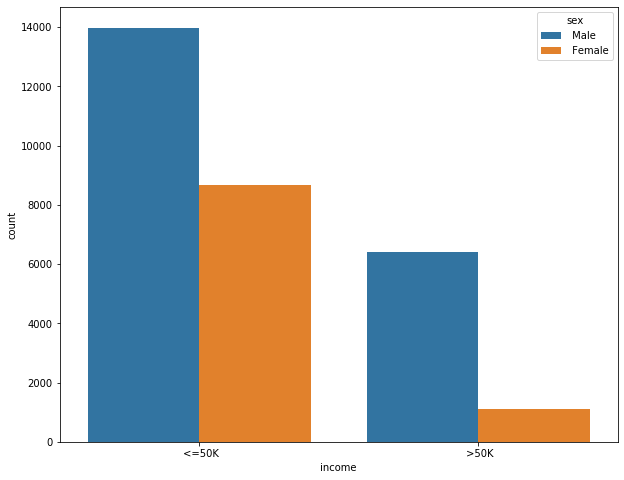

In [37]:
plt.figure(figsize=(10,8))
sns.countplot('income', hue='sex', data=dataset_adult2)

### el genero tambien es un indicador para tener ingresos superiores a 50K

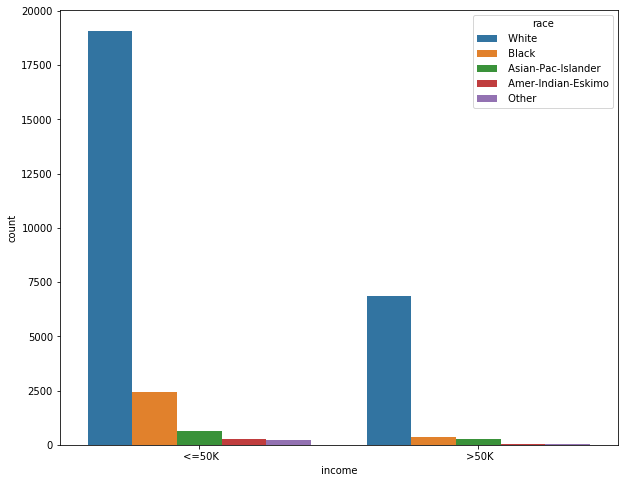

In [38]:
plt.figure(figsize=(10,8))
sns.countplot('income', hue='race', data=dataset_adult2)

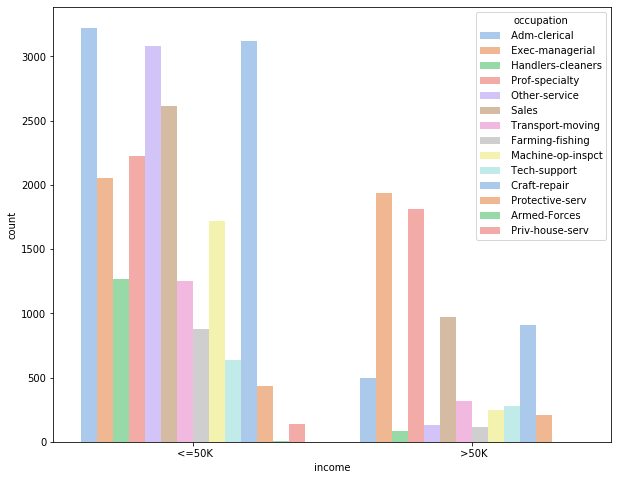

In [39]:
plt.figure(figsize=(10,8))
sns.countplot('income', hue='occupation', data=dataset_adult2, palette='pastel')

### la ocupacion tambien es un indicador directo involucrado con los ingresos

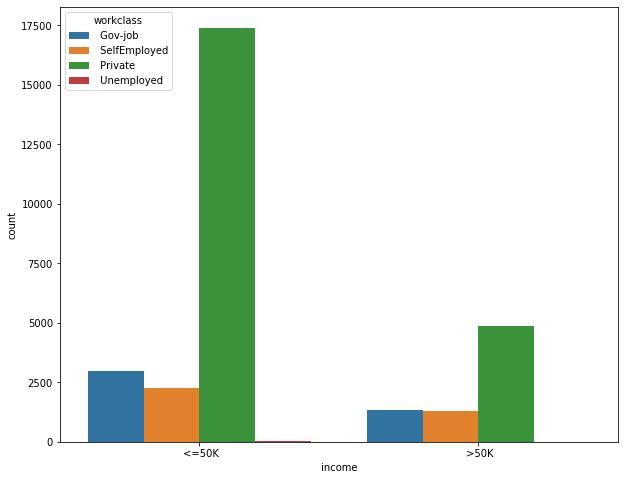

In [40]:
plt.figure(figsize=(10,8))
sns.countplot('income', hue='workclass', data=dataset_adult2)

### la entidad en donde se labora tambien es un factor involucrado con los ingresos

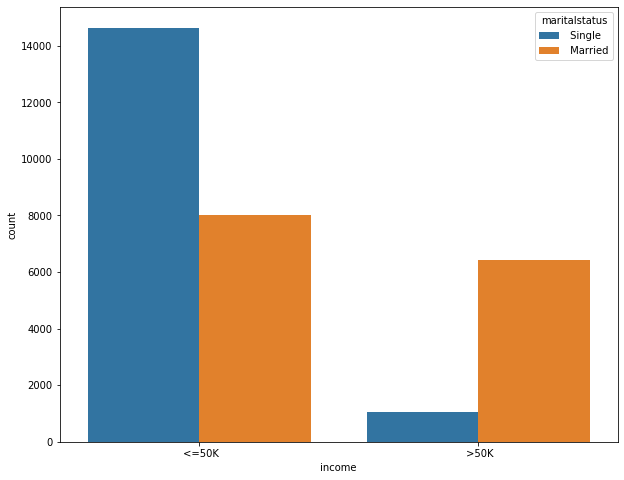

In [41]:
plt.figure(figsize=(10,8))
sns.countplot('income', hue='maritalstatus', data=dataset_adult2)

### el estado civil tambien está involucrado directamente con los ingresos

In [97]:
#print(dataset_adult2.columns)
#data original dataset_adult2.head()
dataset_adult3 = dataset_adult2.copy()

dataset_adult4 = dataset_adult2.copy()
#dataset_adult4.head()

In [98]:
print(dataset_adult3["workclass"].unique())
print(dataset_adult3["education"].unique())
print(dataset_adult3["maritalstatus"].unique())
print(dataset_adult3["occupation"].unique())
print(dataset_adult3["relationship"].unique())
print(dataset_adult3["race"].unique())
print(dataset_adult3["sex"].unique())

[' Gov-job' ' SelfEmployed' ' Private' ' Unemployed']
[' College' ' High-School' ' Advanced-Studies' ' Professional-School'
 ' Elementary-School']
[' Single' ' Married']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']


In [99]:
# Hay que transformar a numéricas las variables categóricas para poder trabajar con ellas
obj_df = dataset_adult3.select_dtypes(include=['object']).copy() # se eligen las variables categoricas (object)
print(obj_df.columns)

from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()

for col in obj_df.columns:
    dataset_adult3[col] = lb_encoder.fit_transform(dataset_adult3[col])

dataset_adult3.head()

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'income'],
      dtype='object')


,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,income
0,39,0,1,1,0,1,4,1,2174,0,40,0
1,50,2,1,0,3,0,4,1,0,0,13,0
2,38,1,3,1,5,1,4,1,0,0,40,0
3,53,1,3,0,5,0,2,1,0,0,40,0
4,28,1,1,0,9,5,2,0,0,0,40,0


### education
Advanced-Studies     = 0
College              = 1
Elementary-School    = 2
High-School          = 3
Professional-School  = 4

### maritalstatus
Married = 0
Single  = 1

### workclass
Gov-job        = 0
SelfEmployed   = 2
Private        = 1
Unemployed     = 3

### occupation
Adm-clerical       = 0
Armed-Forces       = 1
Craft-repair       = 2
Exec-managerial    = 3
Farming-fishing    = 4
Handlers-cleaners  = 5
Machine-op-inspct  = 6
Other-service      = 7
Priv-house-serv    = 8
Prof-specialty     = 9
Protective-serv    = 10
Sales              = 11
Tech-support       = 12
Transport-moving   = 13

### relationship
Husband        = 0
Not-in-family  = 1
Other-relative = 2
Own-child      = 3
Wife           = 5
Unmarried      = 4

### race
Amer-Indian-Eskimo  = 0
Asian-Pac-Islander  = 1
Black               = 2
Other               = 3
White               = 4

### sex
Female  = 0
Male    = 1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            30162 non-null  int64
 1   workclass      30162 non-null  int64
 2   education      30162 non-null  int64
 3   maritalstatus  30162 non-null  int64
 4   occupation     30162 non-null  int64
 5   relationship   30162 non-null  int64
 6   race           30162 non-null  int64
 7   sex            30162 non-null  int64
 8   capitalgain    30162 non-null  int64
 9   capitalloss    30162 non-null  int64
 10  hoursperweek   30162 non-null  int64
 11  income         30162 non-null  int64
dtypes: int64(12)
memory usage: 3.0 MB


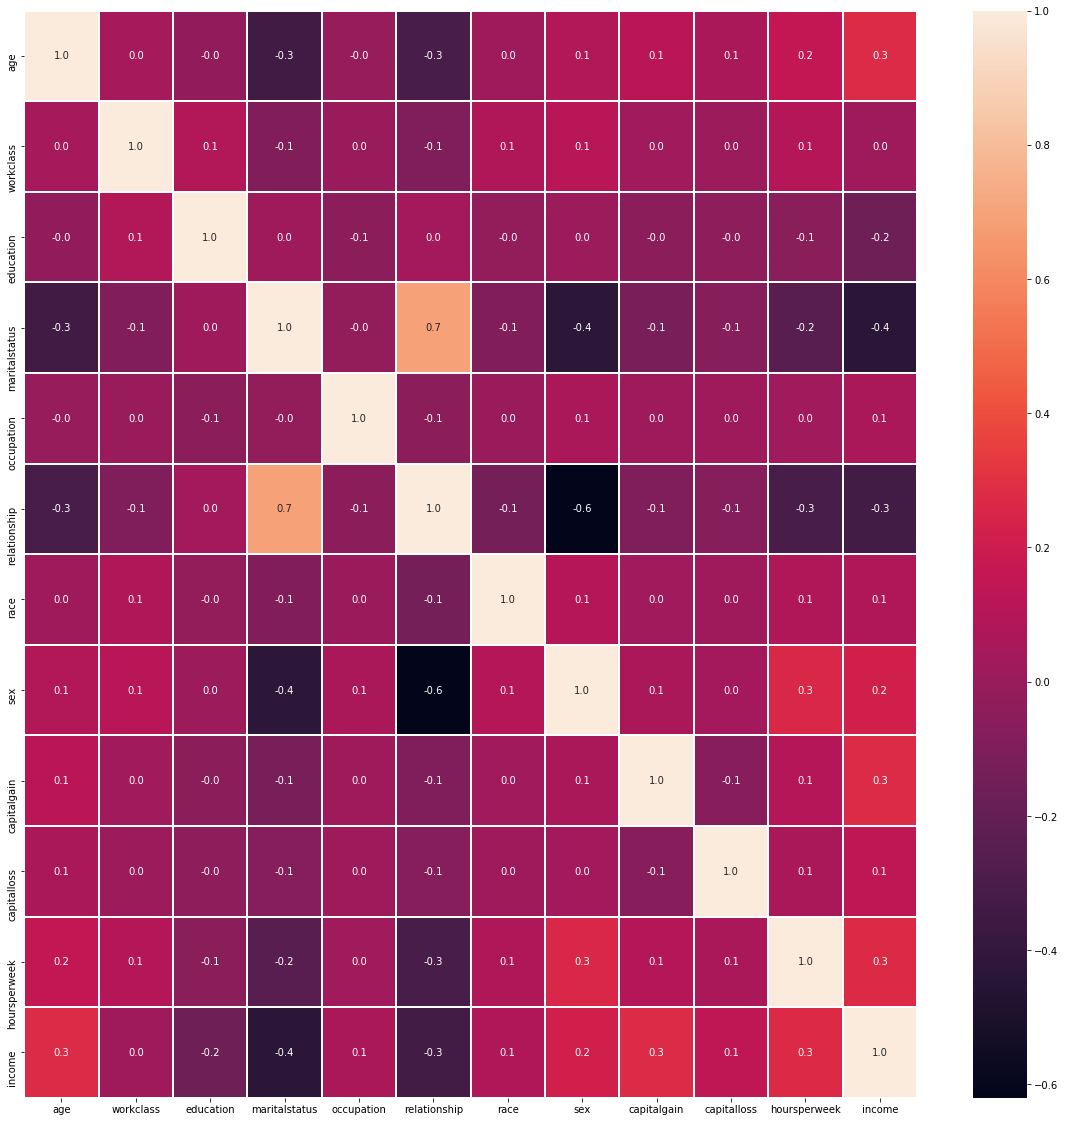

In [100]:
dataset_adult3.info()
# Correlación entre variables
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(dataset_adult3.corr(method='spearman'),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.show()

* Se puede apreciar como hay una alta correlación entre las variables de *hoursperweek* algo esperado como influencia directa en que los ingresos sean superiores a 50K.
* las variables age, maritalstatus, relationship tiene correlacion con los ingresos.
* el capitalgain y capitalloss influyen en si la persona puede ganar el resultado esperado.

* Adicionalmente se puede validar por los resultados indicados arriba (gráficas) que los datos de las variables de:
            age
            workclass
            education
            maritalstatus
            occupation
            relationship
            race
            sex
            capitalgain
            capitalloss
            hoursperweek
            income
influyen en gran medida en si una persona puede tener ingresos superiores o no a 50K

### Data Preprocessing

*** El objetivo es procesar la informacion del dataset y adecuar los datos para poder implementar los algoritmos que nos indicarán la precision (accuracy) que tiene cada algoritmo ***

Segun los datos observados nos encontramos frente a datos que tenemos que clasificar, para esto vamos a usar los siguientes algoritmos para ver el nivel de precision en la preccion y de acuerdo a eso podremos concluir cual ha sido el mejor de estos.

* Regresión logística
* KNN
* Naive Bayes
* Árboles de desición
* Ramdom Forest

In [101]:
# Dataset solo con las columnas que interesan
dataset_adult3.columns

Index(['age', 'workclass', 'education', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'income'],
      dtype='object')

In [102]:
dataset_new = dataset_adult3[['age', 'workclass', 'education', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss','hoursperweek', 'income']].copy()

print(dataset_new.shape)
dataset_new.head()

(30162, 12)


,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,income
0,39,0,1,1,0,1,4,1,2174,0,40,0
1,50,2,1,0,3,0,4,1,0,0,13,0
2,38,1,3,1,5,1,4,1,0,0,40,0
3,53,1,3,0,5,0,2,1,0,0,40,0
4,28,1,1,0,9,5,2,0,0,0,40,0


*** separamos las varibles numericas para luego unirlas con las variables nomiles convertidas a numericas ***

In [103]:
new_dataset_adult3 = dataset_new[["age", "capitalgain", "capitalloss","hoursperweek", "income","sex"]]

aux = pd.get_dummies(dataset_new["workclass"], drop_first = True)
aux.columns = [str(col)+"_workclass" for col in list(aux.columns)]
new_dataset_adult3 = new_dataset_adult3.join(aux, how='inner')

aux = pd.get_dummies(dataset_new["education"], drop_first = True)
aux.columns = [str(col)+"_education" for col in list(aux.columns)]
new_dataset_adult3 = new_dataset_adult3.join(aux, how='inner')

aux = pd.get_dummies(dataset_new["maritalstatus"], drop_first = True)
aux.columns = [str(col)+"_maritalstatus" for col in list(aux.columns)]
new_dataset_adult3 = new_dataset_adult3.join(aux, how='inner')

aux = pd.get_dummies(dataset_new["occupation"], drop_first = True)
aux.columns = [str(col)+"_occupation" for col in list(aux.columns)]
new_dataset_adult3 = new_dataset_adult3.join(aux, how='inner')

aux = pd.get_dummies(dataset_new["relationship"], drop_first = True)
aux.columns = [str(col)+"_relationship" for col in list(aux.columns)]
new_dataset_adult3 = new_dataset_adult3.join(aux, how='inner')

aux = pd.get_dummies(dataset_new["race"], drop_first = True)
aux.columns = [str(col)+"_race" for col in list(aux.columns)]
new_dataset_adult3 = new_dataset_adult3.join(aux, how='inner')

new_dataset_adult3.head()

,age,capitalgain,capitalloss,hoursperweek,income,sex,1_workclass,2_workclass,3_workclass,1_education,...,13_occupation,1_relationship,2_relationship,3_relationship,4_relationship,5_relationship,1_race,2_race,3_race,4_race
0,39,2174,0,40,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,50,0,0,13,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,38,0,0,40,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,53,0,0,40,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,0,40,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0


*** los datos de las variables nominales fueron dividos categoricos de 0 y 1 es por eso que se puede visualizar mas variables
este tratamiento se realizo para poder trabajarlos***

In [125]:
y = new_dataset_adult3['income'].values
features = [col for col in new_dataset_adult3.columns if col not in ['income']]
X = new_dataset_adult3[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

*** la variable income asignamos a "y" (es la variable objetivo 0 representa a "<=50K" y 1 a ">50K") 
el resto de valores lo asignamos al "X" filtrando la variable income y tomamos el 30% de la data para prueba para entrenar el 70% *** 

### Regression Lineal

In [123]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Entrenamiento del modelo
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('El modelo de regresion logistica tiene un porcentaje de precision con todos sus caracteristicas de: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
#logreg.predict([[1,7,3,7,0,2,0]])

El modelo de regresion logistica tiene un porcentaje de precision con todos sus caracteristicas de: 0.8488


### Arboles de decision

In [114]:
# Entrenamiento del modelo
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', # criterio usado
                                    max_leaf_nodes = None, # si se quiere definir un maximo de hojas por nodo
                                    min_samples_split = 2, # numero minimo de datos para hacer un split
                                    max_features = None, # si se quiere definir un limite de features usadas
                                    random_state = 0)
classifier.fit(X_train, y_train)

# Prediccion
y_pred = classifier.predict(X_test)
print('El modelo de arboles de decision tiene un porcentaje de precision con todos sus caracteristicas de: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


El modelo de arboles de decision tiene un porcentaje de precision con todos sus caracteristicas de: 0.8169


### Ramdom Forest

In [120]:
# pero se puede utilizar para agilizar los cálculos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

# Entrenamiento del modelo
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy',
                                    max_leaf_nodes = None, # si se quiere definir un maximo de hojas por nodo
                                    min_samples_split = 2, # numero minimo de datos para hacer un split
                                    max_features = None, # si se quiere definir un limite de features usadas
                                    random_state = 0)


classifier.fit(X_train, y_train)

# Prediccion
y_pred = classifier.predict(X_test)

print('El modelo de arboles de decision tiene un porcentaje de precision con todos sus caracteristicas de: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


El modelo de arboles de decision tiene un porcentaje de precision con todos sus caracteristicas de: 0.8388


### KNN

In [58]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Entrenamiento del modelo
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean', p = 2) # Defino una distancia que interesa, como la Euclidea
classifier.fit(X_train, y_train)

# Prediccion
y_pred = classifier.predict(X_test)

print('El modelo de KNN tiene un porcentaje de precision con todos sus caracteristicas de: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


El modelo de KNN tiene un porcentaje de precision con todos sus caracteristicas de: 0.8308


### Naive Bayes

In [126]:
# Entrenamiento
from sklearn.naive_bayes import GaussianNB
# No se especifican parametros de de entrada aunque se podria especificar unas probabilidades
# a priori distintas de las que se infieren directamente con los datos de train.
classifier = GaussianNB() 
classifier.fit(X_train, y_train)


# Predicciones
y_pred = classifier.predict(X_test)

print('El modelo de redes bayesianas tiene un porcentaje de precision con todos sus caracteristicas de: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

El modelo de redes bayesianas tiene un porcentaje de precision con todos sus caracteristicas de: 0.8273


### Conclusiones

* De los 5 alogoritmos evaluados el que nos arrojo mayor precision de predicion fue el regresion lineal seguido por el de ramdom forest
* los datos usados en la prueba influyen directamente en el resultado, po lo que si discriminamos alguno de estos el porcentaje de precisión disminuye en un 1% a 3%, dependiendo que variables se discriminan.
* los adultos con una formación académica de avanzada (0) (agrupados de Prof-school y Doctorado) tendrán mejores ingresos y es probable que sus ingresos sean superiores a 50K.
* los profesionales que trabajen en el sector privado y ocupen cargos como Prof-specility y Exec-managrel tendrán más posibilidades de obtener ingresos superiores a 50K.
* El genero nos proporciona información útil sobre los datos de que los hombres (0) tienen más probabilidades de tener un ingreso más alto.
* El cuadro de relaciones nos muestra que los casados tienen mayores ingresos. Una pareja casada probablemente ganaría> 50K.

### ejemplo de ingesta de datos
- age             = 52
- capitalgain     = 0
- capitalloss     = 0
- hoursperweek    = 45
- sex             = 1 (Male)
- 1_workclass     = 0
- 2_workclass     = 1 (SelfEmployed)
- 3_workclass     = 0
- 1_education     = 0
- 2_education     = 0
- 3_education     = 1 (High-School)
- 4_education     = 0
- 1_maritalstatus = 0 (Married)
- 1_occupation    = 0
- 2_occupation    = 0
- 3_occupation    = 1 (Exec-managerial)
- 4_occupation    = 0
- 5_occupation    = 0
- 6_occupation    = 0
- 7_occupation    = 0
- 8_occupation    = 0
- 9_occupation    = 0
- 10_occupation   = 0
- 11_occupation   = 0
- 12_occupation   = 0
- 13_occupation   = 0
- 1_relationship  = 0 (Husband)
- 2_relationship  = 0
- 3_relationship  = 0
- 4_relationship  = 0
- 5_relationship  = 0
- 1_race          = 0
- 2_race          = 0
- 3_race          = 0
- 4_race          = 1 (White)

In [127]:
logreg.predict([[52,0,0,45,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]])

array([1])

In [128]:
classifier.predict([[52,0,0,45,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]])

array([1])

***Podemos observar que el modelo de prediccion en este caso indica que esta persona puede ganar mas 50k podriamos suponer que posee un negocio propio***